<a href="https://colab.research.google.com/github/tberros/Analisis-de-datos/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
import datetime
drive.mount('/content/drive')


def cargar_datos(ruta_archivo):
    return pd.read_excel(ruta_archivo)

def time_to_minutes(time_val):
    if pd.isna(time_val):
        return np.nan
    return time_val.hour * 60 + time_val.minute + time_val.second / 60

def procesar_datos(data):
    data.columns = data.columns.str.strip()
    time_columns = ['Horas de uso', 'Videos', 'Juegos', 'Social']
    for col in time_columns:
        data[col] = data[col].apply(time_to_minutes)
    return data


def grafico_uso_por_dia(data):
    uso_por_dia = data.groupby('Dia').sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=uso_por_dia.index, y=uso_por_dia['Horas de uso'], palette='viridis')
    plt.title('Uso total del celular por día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Minutos totales de uso')
    plt.xticks(rotation=45)
    plt.show()

def histograma_uso_por_categoria(data):
    plt.figure(figsize=(12, 8))
    for column in ['Horas de uso', 'Videos', 'Juegos', 'Social']:
        sns.histplot(data[column], kde=True, label=f'{column}')
    plt.legend(title='Categoría')
    plt.title('Histograma de uso del celular por categoría')
    plt.xlabel('Minutos de uso')
    plt.ylabel('Frecuencia')
    plt.show()

def mapa_calor_correlacion(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[['Horas de uso', 'Videos', 'Juegos', 'Social']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mapa de calor de correlación entre categorías')
    plt.show()

def time_to_minutes(time_val):
    if isinstance(time_val, datetime.time):
        return time_val.hour * 60 + time_val.minute + time_val.second / 60
    return np.nan


def grafico_comparacion_semanal(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data.values, marker='o', linestyle='-', color='g')
    plt.title('Comparación del uso del celular semana a semana')
    plt.xlabel('Número de semana')
    plt.ylabel('Minutos totales de uso')
    plt.grid(True)
    plt.show()

def grafico_duracion_sesiones(data):
    sesiones_cortas = data[data <= 60]
    sesiones_medias = data[(data > 60) & (data <= 300)]
    sesiones_largas = data[data > 300]

    categorias = ['Cortas (<60 min)', 'Medias (60-300 min)', 'Largas (>300 min)']
    valores = [len(sesiones_cortas), len(sesiones_medias), len(sesiones_largas)]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorias, y=valores, palette='pastel')
    plt.title('Distribución de la duración de sesiones de uso del celular')
    plt.xlabel('Categoría de Duración')
    plt.ylabel('Número de Sesiones')
    plt.show()


ruta_archivo = '/content/drive/MyDrive/principiosDeModelado/datosUsoCelular.xlsx'

data = pd.read_excel(ruta_archivo)  # Asegúrate de usar la ruta correcta

# Limpieza de nombres de columnas
data.columns = data.columns.str.strip()
# Aplicar la función de conversión de tiempo a minutos a la columna 'Horas de uso'
data['Horas de uso en minutos'] = data['Horas de uso'].apply(time_to_minutes)

# Revisión de la distribución y suma de minutos de uso por semana
uso_semanal = data.groupby('Semana')['Horas de uso en minutos'].sum()

# Revisión de la distribución de duración de sesiones en minutos
distribucion_duracion = data['Horas de uso en minutos'].describe()

uso_semanal, distribucion_duracion
datos = cargar_datos(ruta_archivo)
datos_procesados = procesar_datos(datos)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


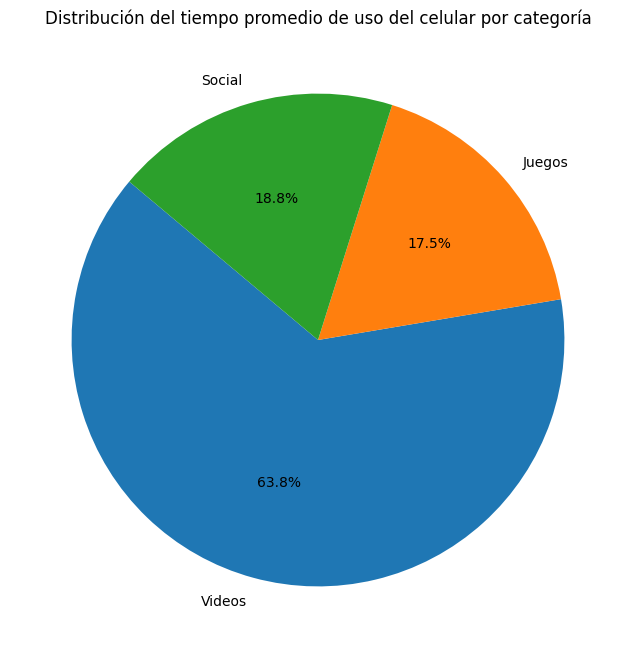

In [ ]:
def grafico_tarta_uso_celular(data):
    promedios = data[['Videos', 'Juegos', 'Social']].mean()
    plt.figure(figsize=(8, 8))
    plt.pie(promedios, labels=promedios.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Distribución del tiempo promedio de uso del celular por categoría')
    plt.show()

grafico_tarta_uso_celular(datos_procesados)

<ipython-input-4-b7b73c30bdfb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_uso_dia.index, y=promedio_uso_dia.values, palette='coolwarm')


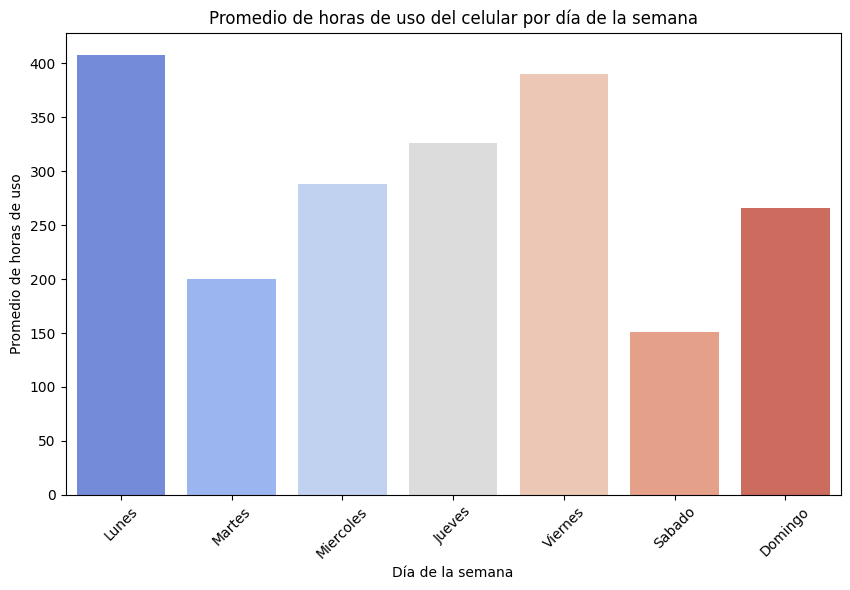

In [ ]:
def grafico_promedio_uso_semanal(data):
    # Agrupando los datos por día y calculando el promedio de 'Horas de uso'
    promedio_uso_dia = data.groupby('Dia')['Horas de uso'].mean()

    # Ordenando los días de la semana en el orden correcto
    dias_ordenados = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
    promedio_uso_dia = promedio_uso_dia.reindex(dias_ordenados)

    # Creando un gráfico de barras para mostrar el promedio de horas de uso por día de la semana
    plt.figure(figsize=(10, 6))
    sns.barplot(x=promedio_uso_dia.index, y=promedio_uso_dia.values, palette='coolwarm')
    plt.title('Promedio de horas de uso del celular por día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Promedio de horas de uso')
    plt.xticks(rotation=45)
    plt.show()

grafico_promedio_uso_semanal(datos_procesados)

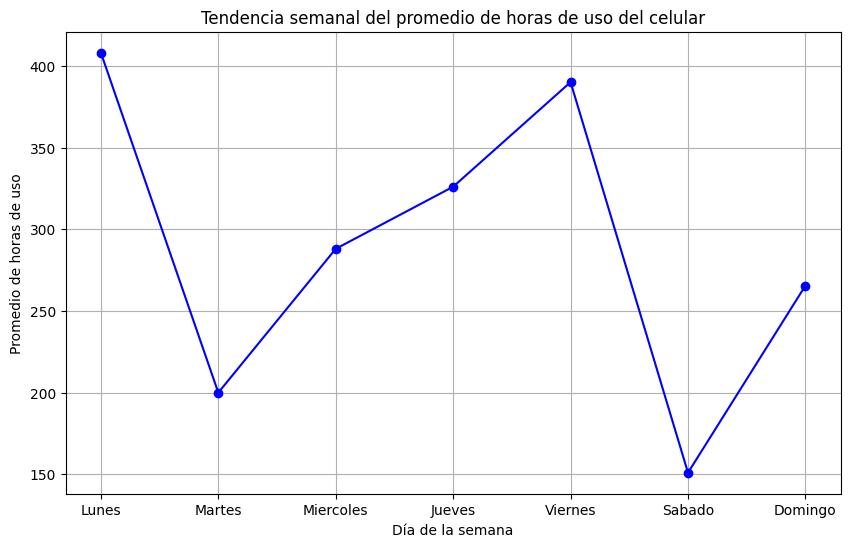

In [ ]:
def grafico_tendencia_semanal(data):
    # Agrupando los datos por día y calculando el promedio de 'Horas de uso'
    promedio_uso_dia = data.groupby('Dia')['Horas de uso'].mean()

    # Ordenando los días de la semana en el orden correcto
    dias_ordenados = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
    promedio_uso_dia = promedio_uso_dia.reindex(dias_ordenados)

    # Creando un gráfico de líneas para mostrar la tendencia del uso promedio a lo largo de la semana
    plt.figure(figsize=(10, 6))
    plt.plot(promedio_uso_dia.index, promedio_uso_dia.values, marker='o', linestyle='-', color='b')
    plt.title('Tendencia semanal del promedio de horas de uso del celular')
    plt.xlabel('Día de la semana')
    plt.ylabel('Promedio de horas de uso')
    plt.grid(True)
    plt.show()

# Llamada a la función utilizando los datos procesados
grafico_tendencia_semanal(datos_procesados)


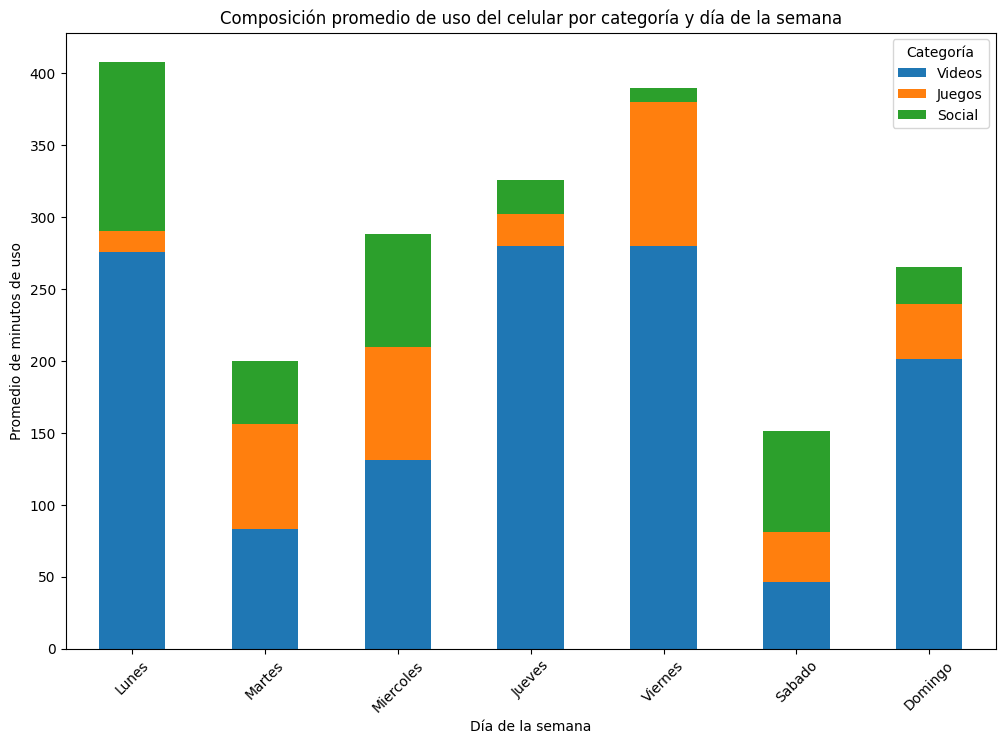

In [ ]:
def grafico_composicion_uso_semanal(data):
    # Calculando el promedio diario para cada categoría
    promedio_uso_categorias = data.groupby('Dia')[['Videos', 'Juegos', 'Social']].mean()

    # Ordenando los días de la semana en el orden correcto
    dias_ordenados = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
    promedio_uso_categorias = promedio_uso_categorias.reindex(dias_ordenados)

    # Creando un gráfico de barras apiladas para mostrar la composición del tiempo de uso por categoría
    plt.figure(figsize=(12, 8))
    promedio_uso_categorias.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
    plt.title('Composición promedio de uso del celular por categoría y día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Promedio de minutos de uso')
    plt.xticks(rotation=45)
    plt.legend(title='Categoría')
    plt.show()

# Llamada a la función utilizando los datos procesados
grafico_composicion_uso_semanal(datos_procesados)


In [ ]:
datos.describe()

,Semana,Horas de uso,Videos,Juegos,Social
count,14.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500000,287.713333,183.356667,50.285556,53.927778
std,0.518875,87.496472,91.122059,28.746251,35.084519
min,1.000000,140.000000,45.000000,15.000000,10.000000
25%,1.000000,229.500000,104.500000,26.500000,26.000000
50%,1.500000,287.700000,195.000000,40.000000,51.000000
75%,2.000000,353.000000,270.500000,72.000000,74.000000
max,2.000000,416.000000,288.000000,100.000000,122.000000


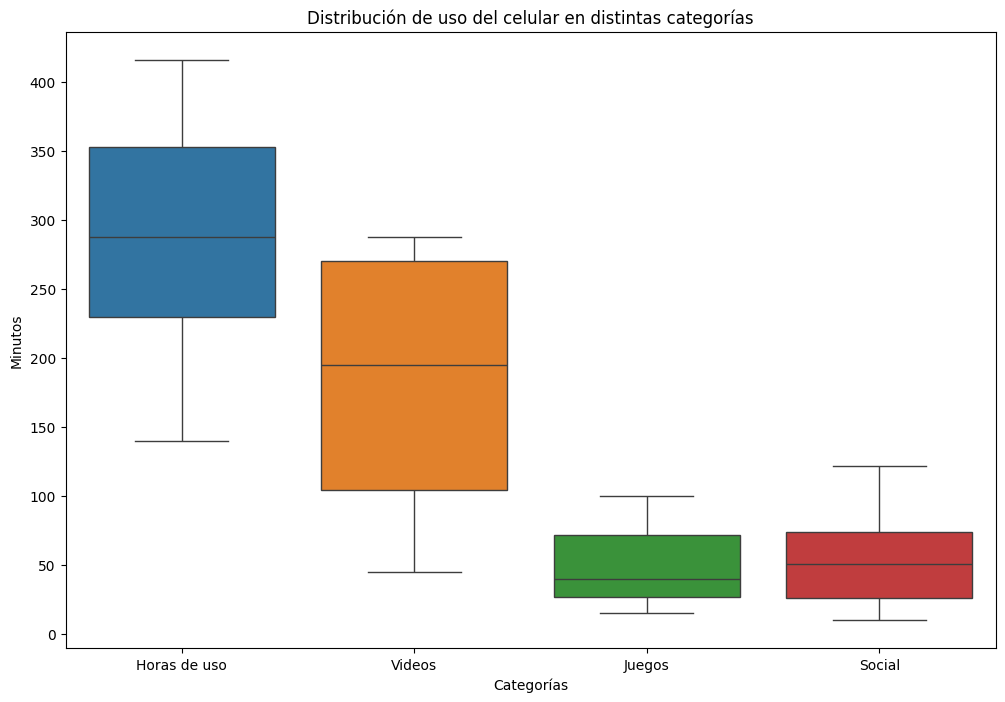

In [ ]:
def grafico_caja_y_bigotes(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[['Horas de uso', 'Videos', 'Juegos', 'Social']])
    plt.title('Distribución de uso del celular en distintas categorías')
    plt.ylabel('Minutos')
    plt.xlabel('Categorías')
    plt.show()

grafico_caja_y_bigotes(datos_procesados)


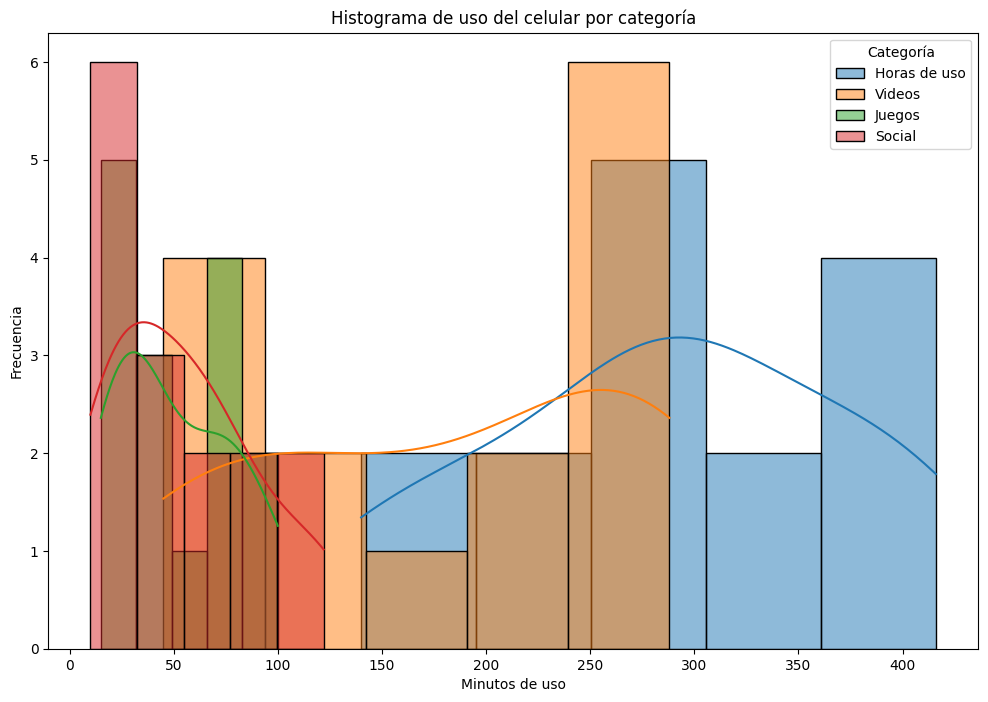

In [ ]:
histograma_uso_por_categoria(datos_procesados)

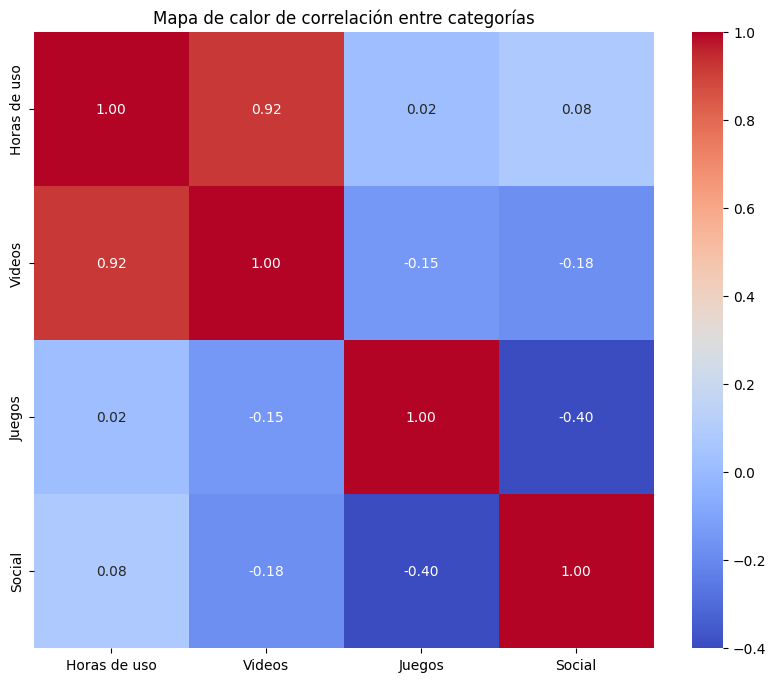

In [ ]:
mapa_calor_correlacion(datos_procesados)

<ipython-input-31-4d6ea5e6bbbb>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias, y=valores, palette='pastel')


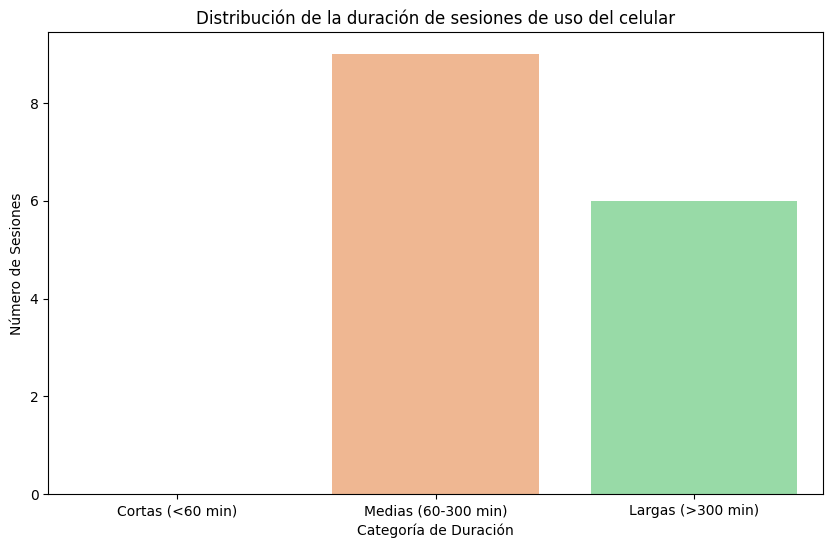

In [ ]:
grafico_duracion_sesiones(data['Horas de uso en minutos'])

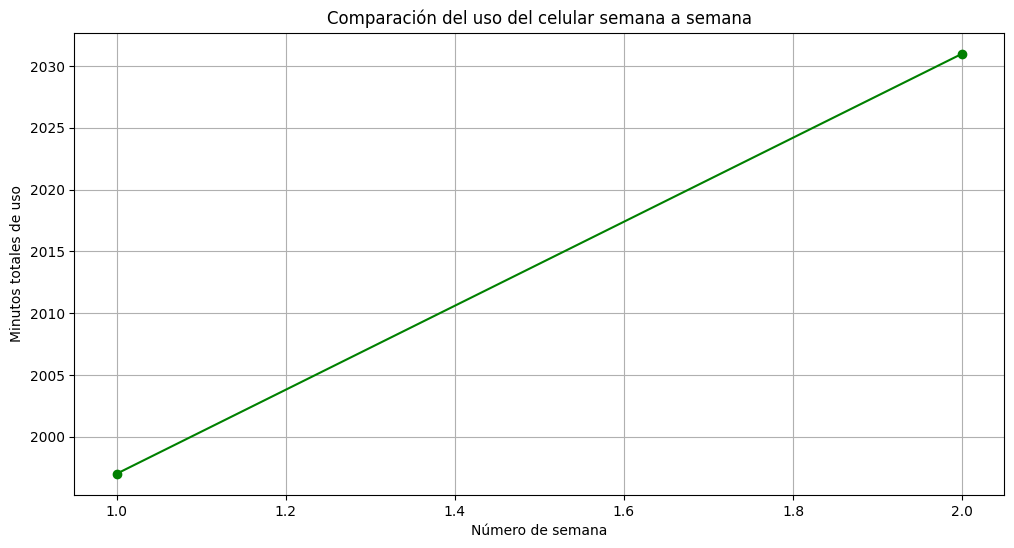

In [ ]:
grafico_comparacion_semanal(uso_semanal)